# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import numpy as np

import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           2.64e-20
Time:                        08:20:24   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

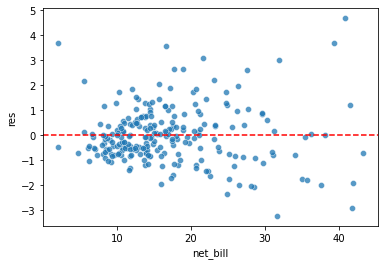

In [16]:
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)
model = sm.OLS(y,X).fit()
tips['res'] = model.resid
print(model.summary())

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           5.02e-23
Time:                        08:31:15   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

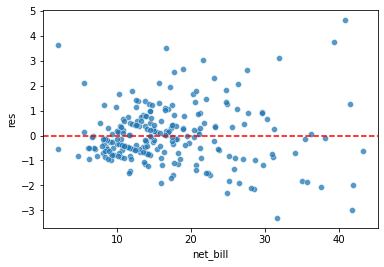

In [36]:
y, X = patsy.dmatrices('tip ~ net_bill', tips)
model = sm.OLS(y,X).fit()
tips['res'] = model.resid
print(model.summary())

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [41]:
tips['pred'] = model.fittedvalues

r = tips[['pred', 'net_bill']].corr().iloc[0,1]
r**2

1.0

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           4.40e-20
Time:                        08:14:45   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430  

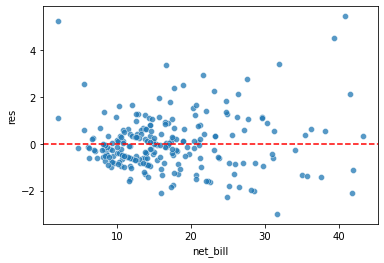

In [5]:
y, X = patsy.dmatrices('tip ~ np.log(net_bill)', tips)
model = sm.OLS(y,X).fit()
tips['res'] = model.resid
print(model.summary())

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           4.96e-22
Time:                        08:17:28   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.07

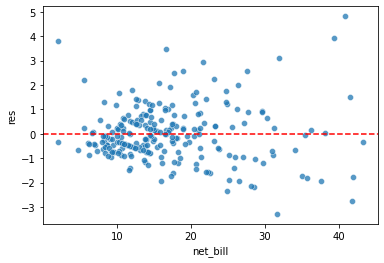

In [13]:
y, X = patsy.dmatrices('tip ~ net_bill + np.power(net_bill,2)', tips)
model = sm.OLS(y,X).fit()
tips['res'] = model.resid
print(model.summary())

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

O melhor modelo foi com o net_bill exponencial.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     7.157
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           1.85e-05
Time:                        08:28:07   Log-Likelihood:                 110.12
No. Observations:                 244   AIC:                            -210.2
Df Residuals:                     239   BIC:                            -192.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3216      0.033      9.

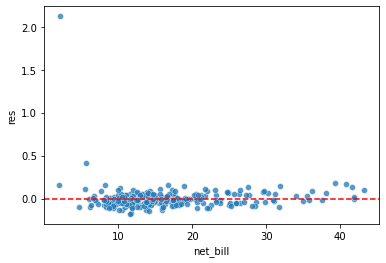

In [34]:
y, X = patsy.dmatrices('tip_pct ~ sex + smoker + time + net_bill', tips)
model = sm.OLS(y,X).fit()
tips['res'] = model.resid
print(model.summary())

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           1.52e-06
Time:                        08:28:09   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

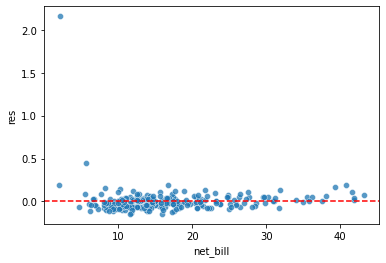

In [35]:
y, X = patsy.dmatrices('tip_pct ~ net_bill', tips)
model = sm.OLS(y,X).fit()
tips['res'] = model.resid
print(model.summary())

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [33]:
tips['pred'] = model.fittedvalues
r = tips[['pred', 'net_bill']].corr().iloc[0,1]

r**2

0.9999999999999991

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           1.62e-13
Time:                        08:17:41   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054  

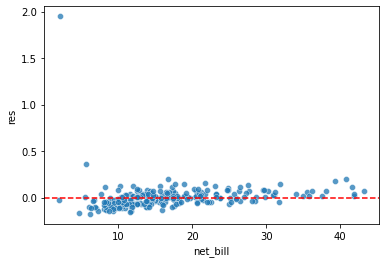

In [14]:
y, X = patsy.dmatrices('tip_pct ~ np.log(net_bill)', tips)
model = sm.OLS(y,X).fit()
tips['res'] = model.resid
print(model.summary())

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           1.06e-09
Time:                        08:18:08   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.48

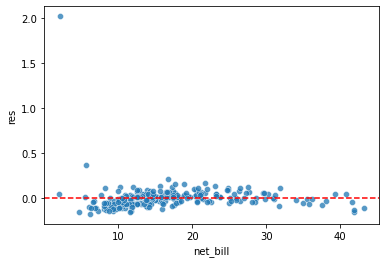

In [15]:
y, X = patsy.dmatrices('tip_pct ~ net_bill + np.power(net_bill,2)', tips)
model = sm.OLS(y,X).fit()
tips['res'] = model.resid
print(model.summary())

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

O modelo do item 1 tem o maior coeficiente de correlação.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [104]:
df = pd.read_csv('C:/Users/pedro/Documents/EBAC/9. Análise descritiva/ex1/previsao_de_renda.csv', sep=',')
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

df.head(3)

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        08:55:22   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561

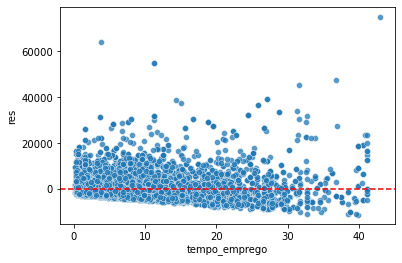

In [105]:
reg = smf.ols('renda ~ tempo_emprego', data=df).fit()

df['res'] = reg.resid

print(reg.summary())

sns.scatterplot(x ='tempo_emprego', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [106]:
print(df.isna().sum().sum())
df.dropna(subset=['tempo_emprego'],axis=0, inplace=True)
df[['tempo_emprego','renda']].shape

5068


(12466, 2)

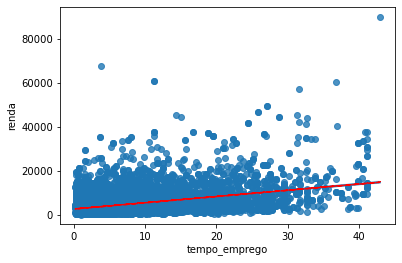

In [107]:
sns.regplot(x = 'tempo_emprego', y = 'renda', data = df)
plt.plot(df['tempo_emprego'], reg.fittedvalues, 'r,--')

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     2478.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        08:55:24   Log-Likelihood:            -1.2241e+05
No. Observations:               12466   AIC:                         2.448e+05
Df Residuals:                   12464   BIC:                         2.448e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

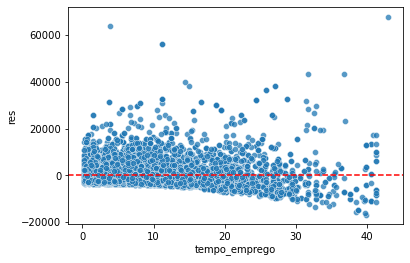

In [108]:
reg = smf.ols('renda ~ np.power(tempo_emprego,2)', data=df).fit()

df['res'] = reg.resid

print(reg.summary())

sns.scatterplot(x ='tempo_emprego', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

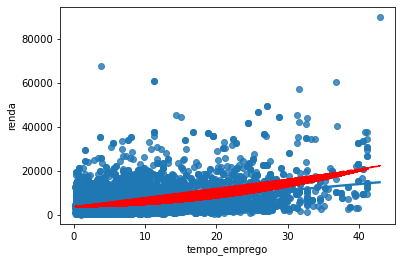

In [103]:
sns.regplot(x = 'tempo_emprego', y = 'renda', data = df)
plt.plot(df['tempo_emprego'], reg.fittedvalues, 'r,--')

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     1195.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:16:38   Log-Likelihood:                -13353.
No. Observations:               12466   AIC:                         2.671e+04
Df Residuals:                   12462   BIC:                         2.674e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

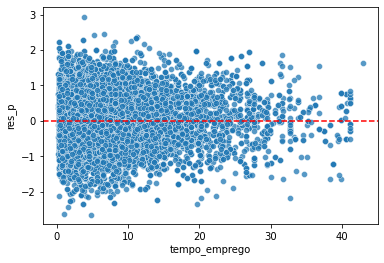

In [141]:
y, X = patsy.dmatrices('np.log(renda) ~  sexo + posse_de_imovel + tempo_emprego', df)
model = sm.OLS(y,X).fit()

df['res_p'] = model.resid

print(model.summary())

sns.scatterplot(x ='tempo_emprego', y = 'res_p', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

Transformando a variável resposta em log os resíduos melhoram e o R² aumenta. De modo geral, parece que o modelo melhorou, mas a custo da transformação do target.